Import Tensorflow, download mnist dataset and store data into variables.

In [79]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Import matplotlib in order to graphically show the first number of the training dataset.

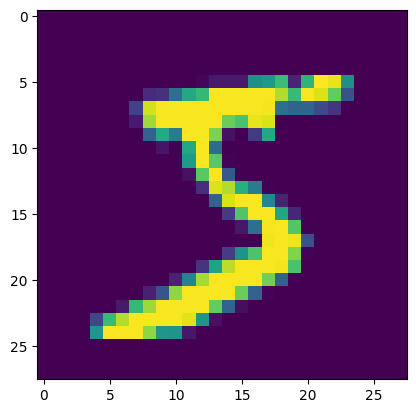

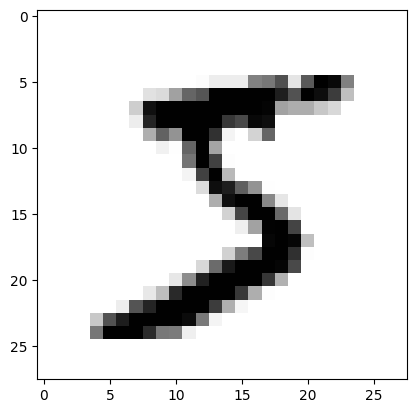

In [80]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

Normalite the data.

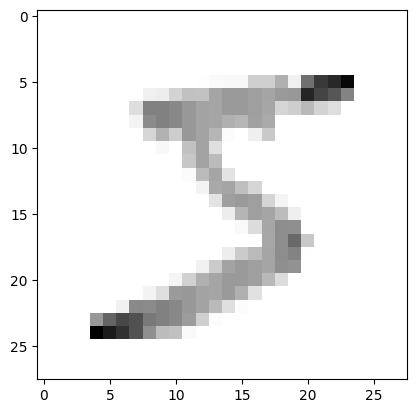

In [81]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

Resizing the image to make it suitable for later Convolution operation.

In [82]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


Creating a deep neural network.

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3rd Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Fully connected layer number 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# Fully connected layer number 2
model.add(Dense(32))
model.add(Activation('relu'))
# Last fully connected layer with softmax activation
model.add(Dense(10))
model.add(Activation('softmax'))

In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_37 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_38 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                

In [85]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3) # train the model

Epoch 1/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3202 - accuracy: 0.8977 - val_loss: 0.1230 - val_accuracy: 0.9626
Epoch 2/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.1052 - accuracy: 0.9684 - val_loss: 0.0862 - val_accuracy: 0.9736
Epoch 3/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 0.0747 - val_accuracy: 0.9776
Epoch 4/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0575 - accuracy: 0.9819 - val_loss: 0.0681 - val_accuracy: 0.9782
Epoch 5/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0464 - accuracy: 0.9848 - val_loss: 0.0737 - val_accuracy: 0.9787


Evaluating model's accuracy.

In [86]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9800
Test Loss 0.07120663672685623
Test Accuracy 0.9800000190734863


Using numpy to encode the model's first prediction.

In [87]:
predictions = model.predict([x_testr])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 3ms/step
7


Visualize the first number in the actual dataset to check the prediction.

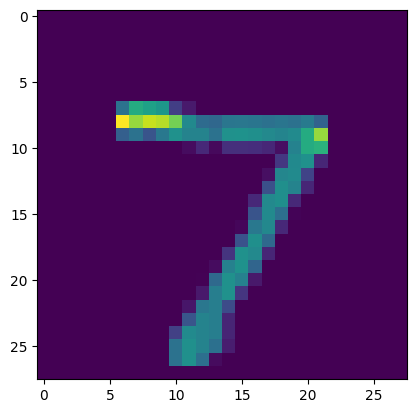

In [88]:
plt.imshow(x_test[0])

Import cv2 to open own images.

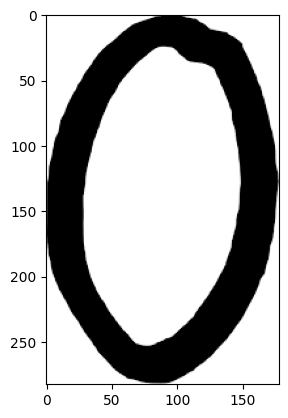

In [89]:
import cv2
img = cv2.imread('images/0.png')
plt.imshow(img)

Normalize the image.

In [90]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
newimg = tf.keras.utils.normalize(resized, axis=1) # 0 to 1 scaling
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # reshaping to feed into our model
print("New Image dimension", newimg.shape)

New Image dimension (1, 28, 28, 1)


Use the model to predict the new number.

In [91]:
predictions = model.predict(newimg)
print(np.argmax(predictions[0]))

1/1 [==============================] - 0s 49ms/step
0
